# Network Systems

This program is a simple graph to describe the relationships (friendships or professional) on various social media sites, such as Facebook and LinkedIn. 

Each node in a friendship graph represents a person. Each person has incoming and outgoing edges leading to other nodes (people). Some nodes are symmetric, while others are asymmetric, and some nodes do not have relationships with anyone.

Rules
- if >= 1/2 of a node's friends like a song, the node will be influenced
- math.ceil is used to round odd number up when calculating # of friends
- nodes that don't have relations are not influenced

This program is written to show the network effect: how friends can influence one another, and how many nodes are required for the entire graph to be influenced.

In [2]:
# Open file and store as an object

file = open("C:/Users/Christine/Documents/Data Sci/ICS 33/python files/Program_1/graph1a.txt", 'r')
lines = file.readlines()

In [3]:
print(lines)

['Annie;Beatrice\n', 'Annie;Charlie\n', 'Beatrice;Charlie\n', 'Charlie;Daniel\n', 'Charlie;Tara\n', 'Daniel;Eric\n', 'Daniel;Frank\n', 'Daniel;Tara\n', 'Charlie;Gareth\n', 'Gareth;Harrison\n', 'Gareth;Jacob\n', 'Iris;Jacob\n', 'Karen;Tara\n', 'Tara;Teresa\n', 'Tara;Oscar\n', 'Oscar;Victor\n', 'Wallie']


In [4]:
from math import ceil
import networkx as nx
import matplotlib as plt

## Create a dictionary to store values

Each dictionary stores the node and its relationships 

In [5]:
items = [tuple(line.strip('\n').split(';')) for line in lines]
print(items)

[('Annie', 'Beatrice'), ('Annie', 'Charlie'), ('Beatrice', 'Charlie'), ('Charlie', 'Daniel'), ('Charlie', 'Tara'), ('Daniel', 'Eric'), ('Daniel', 'Frank'), ('Daniel', 'Tara'), ('Charlie', 'Gareth'), ('Gareth', 'Harrison'), ('Gareth', 'Jacob'), ('Iris', 'Jacob'), ('Karen', 'Tara'), ('Tara', 'Teresa'), ('Tara', 'Oscar'), ('Oscar', 'Victor'), ('Wallie',)]


In [6]:
# Create a dictionary to store values
store_dict = dict(list())

# Create a influencer dictionary
infl_dict = dict(set()) 

In [9]:
def read_graph():
    '''returns the dictionary representing friendship graph'''
    for item in items:
        if len(item) == 2:
            if item[0] in store_dict and item[1] not in store_dict:
                store_dict[item[0]].append(item[1])
                store_dict[item[1]] = [item[0]]
            elif item[1] in store_dict and item[0] not in store_dict:
                store_dict[item[1]].append(item[0])
                store_dict[item[0]] = [item[1]]
            elif items[0] not in store_dict.keys() and item[1] not in store_dict.keys():
                store_dict[item[0]] = [item[1]]
                store_dict[item[1]] = [item[0]]
            else:
                [store_dict[item[0]]].append(item[1])
                [store_dict[item[1]]].append(item[0])
        else:
            store_dict[item[0]] = []

#create initial store_dict
read_graph()
print(store_dict)

{'Annie': ['Beatrice', 'Charlie'], 'Beatrice': ['Annie'], 'Charlie': ['Annie', 'Daniel', 'Tara', 'Gareth'], 'Daniel': ['Charlie', 'Eric', 'Frank'], 'Tara': ['Charlie', 'Karen', 'Teresa', 'Oscar'], 'Eric': ['Daniel'], 'Frank': ['Daniel'], 'Gareth': ['Charlie', 'Harrison', 'Jacob'], 'Harrison': ['Gareth'], 'Jacob': ['Gareth', 'Iris'], 'Iris': ['Jacob'], 'Karen': ['Tara'], 'Teresa': ['Tara'], 'Oscar': ['Tara', 'Victor'], 'Victor': ['Oscar'], 'Wallie': []}


In [10]:
# shows graph as a str

def graph_as_str(dict):
    '''when printed shows contents of graph'''
    for k, v in store_dict.items():
        print(k, '->', v)
        
graph_as_str(store_dict)

Annie -> ['Beatrice', 'Charlie']
Beatrice -> ['Annie']
Charlie -> ['Annie', 'Daniel', 'Tara', 'Gareth']
Daniel -> ['Charlie', 'Eric', 'Frank']
Tara -> ['Charlie', 'Karen', 'Teresa', 'Oscar']
Eric -> ['Daniel']
Frank -> ['Daniel']
Gareth -> ['Charlie', 'Harrison', 'Jacob']
Harrison -> ['Gareth']
Jacob -> ['Gareth', 'Iris']
Iris -> ['Jacob']
Karen -> ['Tara']
Teresa -> ['Tara']
Oscar -> ['Tara', 'Victor']
Victor -> ['Oscar']
Wallie -> []


## Visualizing the network

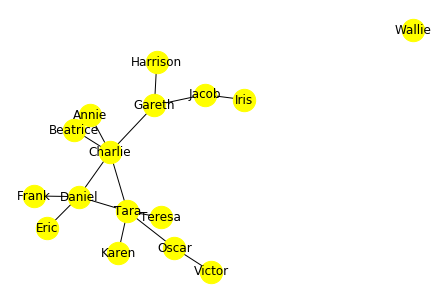

In [12]:
G=nx.Graph()
G.add_nodes_from(store_dict.keys())
items2=items
#items2.remove(('Wallie',))
G.add_edges_from(items2)
nx.draw(G,with_labels = True, node_size=500, node_color='yellow')

## Create an influencer dictionary

Each dictionary item represents a node. Each node is a 3-list
- index 0: the number of friends of the node minus the number of friends needed to influence the node 
    (this second value is the ceil of half the number of its friends); but, if a node contains no friends, 
    the value stored at index 0 should be -1.
- index 1: the number of friends of the node
- index 2: the node name itself (duplicating the key)


In [13]:
# shows nodes that can be influenced

def all_influenced():
    '''compute/return set of nodes that can be influenced by set'''
    return(set(infl_dict.keys()))
    

In [14]:
# Create influencer algorithm to find nodes that influence
# Either set trace = true/false

def find_influencers(trace = False):
    '''compute/return small set of nodes that can influence everyone'''
    # Build initial infl_dict
    for k,v in store_dict.items():
        if len(v) != 0:
            infl_dict[k] = [len(v)-ceil(len(v)/2), len(v), k]
        else:
            infl_dict[k] = [-1, len(v), k]

    # Removal candidates
    remove_cand = [v for v in infl_dict.values() if v[0]>=0]
    
    while len(remove_cand)!=0:
        # find smallest candidate
        sm_cand = sorted(remove_cand, key=lambda x : x[1])[0]

        # removing smallest candidate from remove_cand
        for r in remove_cand:
            if r[2] == sm_cand[2]:
                remove_cand.remove(r)
        
        # removing smallest candidate from infl_dict and friend's values
        for k,v in store_dict.items():
            if sm_cand[2] in v:
                v = v.remove(sm_cand[2])
                infl_dict[k][0]-=1
                infl_dict[k][1]-=1
                
        if trace == True:
            G.add_nodes_from(store_dict.keys())
            print('influencer dictionary:', infl_dict)
            print('removal candidates', remove_cand)
            print(sm_cand, 'is the smallest candidate')
            print('Removing', sm_cand[2], 'as key from influencer dictionary & decreasing friends values')            
        infl_dict.pop(sm_cand[2])
        store_dict.pop(sm_cand[2])
        remove_cand = [v for v in infl_dict.values() if v[0]>=0]
        
find_influencers(True)
unreached = all_influenced()

influencer dictionary: {'Annie': [0, 1, 'Annie'], 'Beatrice': [0, 1, 'Beatrice'], 'Charlie': [2, 4, 'Charlie'], 'Daniel': [1, 3, 'Daniel'], 'Tara': [2, 4, 'Tara'], 'Eric': [0, 1, 'Eric'], 'Frank': [0, 1, 'Frank'], 'Gareth': [1, 3, 'Gareth'], 'Harrison': [0, 1, 'Harrison'], 'Jacob': [1, 2, 'Jacob'], 'Iris': [0, 1, 'Iris'], 'Karen': [0, 1, 'Karen'], 'Teresa': [0, 1, 'Teresa'], 'Oscar': [1, 2, 'Oscar'], 'Victor': [0, 1, 'Victor'], 'Wallie': [-1, 0, 'Wallie']}
removal candidates [[0, 1, 'Annie'], [2, 4, 'Charlie'], [1, 3, 'Daniel'], [2, 4, 'Tara'], [0, 1, 'Eric'], [0, 1, 'Frank'], [1, 3, 'Gareth'], [0, 1, 'Harrison'], [1, 2, 'Jacob'], [0, 1, 'Iris'], [0, 1, 'Karen'], [0, 1, 'Teresa'], [1, 2, 'Oscar'], [0, 1, 'Victor']]
[0, 1, 'Beatrice'] is the smallest candidate
Removing Beatrice as key from influencer dictionary & decreasing friends values
influencer dictionary: {'Annie': [0, 1, 'Annie'], 'Charlie': [1, 3, 'Charlie'], 'Daniel': [1, 3, 'Daniel'], 'Tara': [2, 4, 'Tara'], 'Eric': [0, 1, 'Er

In [15]:
unreached

{'Daniel', 'Gareth', 'Tara', 'Wallie'}

In [ ]:
file.close()